In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [10]:
cr_loan = pd.read_csv('cr_loan.csv')

In [ ]:
# Check the structure of the data
print(cr_loan.dtypes)

# Check the first five rows of the data
print(cr_loan.head())

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D

# Exploring with Visuals

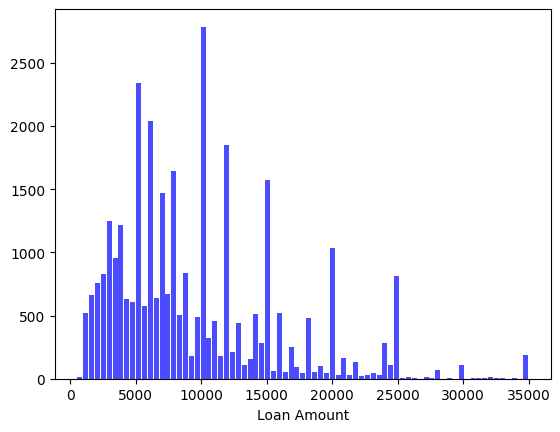

In [11]:
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

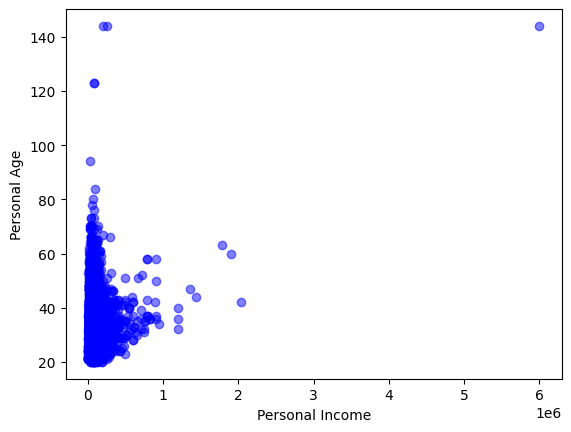

In [12]:
# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'], c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Personal Age')
plt.show()

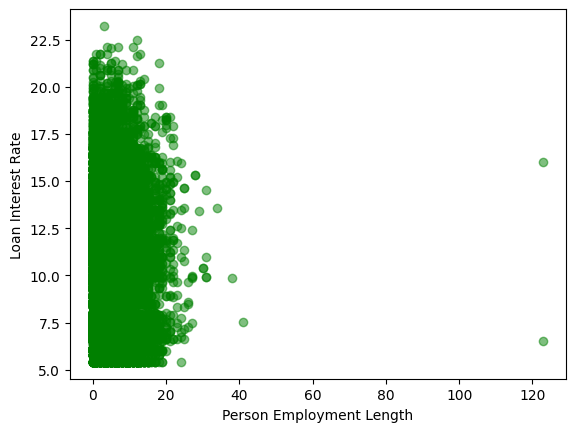

In [13]:
# Plot a scatter plot of employment length against interest rate
plt.scatter(cr_loan['person_emp_length'], cr_loan['loan_int_rate'], c='green', alpha=0.5)
plt.xlabel('Person Employment Length')
plt.ylabel('Loan Interest Rate')
plt.show()

# Exploring Dataset with Cross Tables

With cross tables, we will get a high level view of selected columns and even aggregation like a count or average. For most credit risk models, especially for probability of default, columns like person_emp_length and person_home_ownership are common to begin investigating.

In [14]:
# Create a cross table of the loan intent and loan status
print(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True))

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


In [15]:
# Create a cross table of the home ownership, loan status, and grade
print(pd.crosstab(cr_loan['person_home_ownership'], [cr_loan['loan_status'], cr_loan['loan_grade']]))

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27  


In [16]:
# Create a cross table of home ownership, loan status, and average percent income
print(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'], values=cr_loan['loan_int_rate'], aggfunc='mean').round(2))

loan_status                0      1
person_home_ownership              
MORTGAGE               10.06  13.43
OTHER                  11.41  13.56
OWN                    10.75  12.24
RENT                   10.75  12.97


In [17]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'], values=cr_loan['person_emp_length'], aggfunc='max'))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


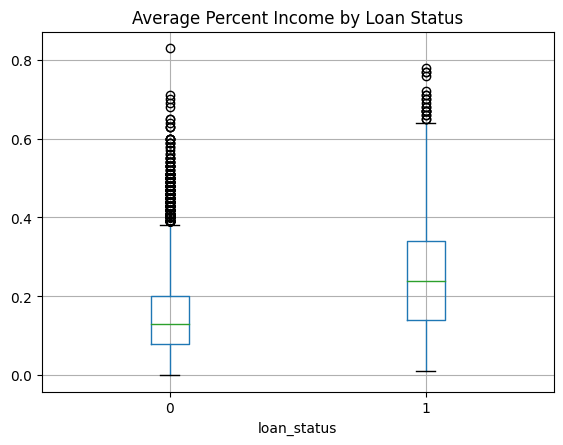

In [19]:
# Create a box plot of percentage by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

It looks like the average percentage of income for defaults is higher. This could indicate those recipients have a debt-to-income ratio that's already too high.

## Finding outliers with cross tables

In [20]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'], values=cr_loan['person_emp_length'], aggfunc='max'))

# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(indices)

# Create the cross table from earlier and include minimum employment length
pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'], values=cr_loan_new['person_emp_length'], aggfunc=['min','max'])

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0

## Visualizing credit outliers

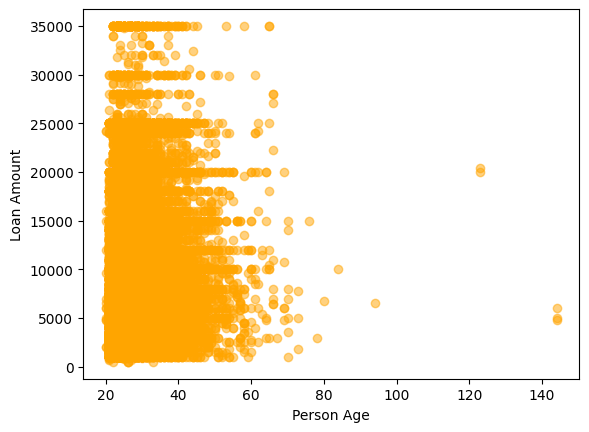

In [21]:
# Create the scatter plot for age and amount
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='orange', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

## Removing Outliers

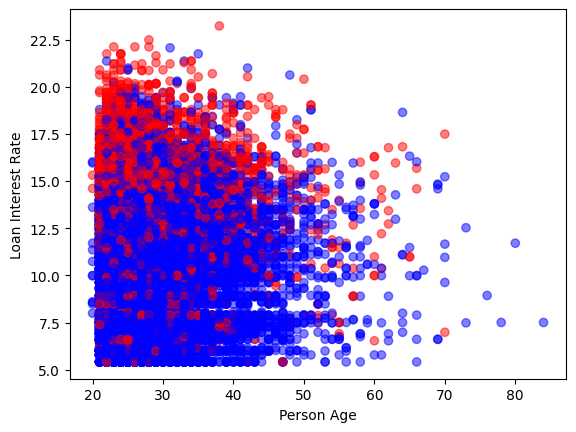

In [24]:
# Use Pandas to drop the record from the data frame and create a new one
cr_loan_new = cr_loan.drop(cr_loan[cr_loan['person_age'] > 100].index)

# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_int_rate'],
            c = cr_loan_new['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

You really .drop() those rows like they're hot! Notice that in the last plot we have loan_status as a label for colors. This shows a different color depending on the class. In this case, it's loan default and non-default, and it looks like there are more defaults with high interest rates.

# Finding Missing Data

In [25]:
null_columns = cr_loan.columns[cr_loan.isnull().any()]
cr_loan[null_columns].isnull().sum()

person_emp_length     895
loan_int_rate        3116
dtype: int64

## Replacing missing data

In [26]:
# Replace the null values with the median value for all employment length
cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace = True)

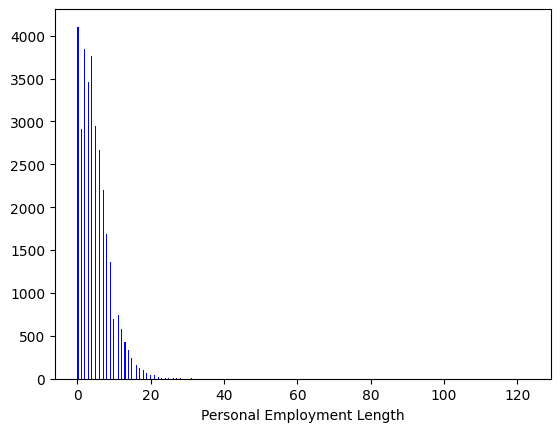

In [27]:
# Create a histogram of employment length
n, bins, parched = plt.hist(cr_loan['person_emp_length'], bins = 'auto', color = 'blue')
plt.xlabel("Personal Employment Length")
plt.show()

In [28]:
# Replace the null values with the mean value for all loan interest rate
cr_loan['loan_int_rate'].fillna((cr_loan['loan_int_rate'].mean()), inplace=True)

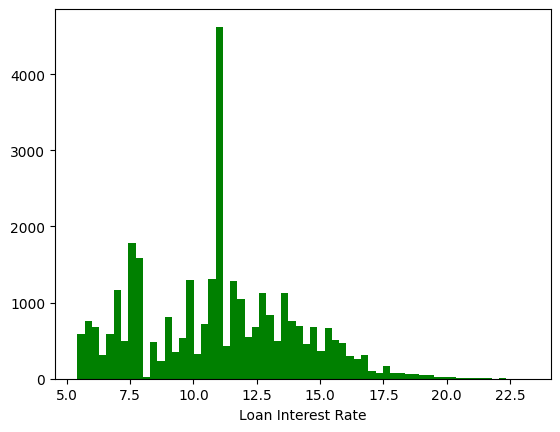

In [29]:
# Create a histogram of loan interest rate
n, bins, patches = plt.hist(cr_loan['loan_int_rate'], bins='auto', color='green')
plt.xlabel("Loan Interest Rate")
plt.show()

## Removing Missing Data

In [30]:
# Print the number of nulls in loan interest rate column
print(cr_loan['loan_int_rate'].isnull().sum())

0


In [31]:
# Store the array on indices
indices_1 = cr_loan[cr_loan['loan_int_rate'].isnull()].index

In [32]:
# Save the new data without missing data
cr_loan_clean = cr_loan.drop(indices_1)

In [33]:
# Print the number of nulls in personal employment length column
print(cr_loan_clean['person_emp_length'].isnull().sum())

0


In [34]:
# Store the array on indices
indices_2 = cr_loan_clean[cr_loan_clean['person_emp_length'].isnull()].index

In [35]:
# Save the new data without missing data
cr_loan_clean = cr_loan_clean.drop(indices_2)

In [36]:
null_columns = cr_loan_clean.columns[cr_loan.isnull().any()]
cr_loan_clean[null_columns].isnull().sum()

Series([], dtype: float64)

## One-hot Coding

In [37]:
cr_loan = pd.read_csv('cr_loan_nout_nmiss.csv')

In [38]:
# Create two data sets for numeric and non-numeric data
cred_num = cr_loan.select_dtypes(exclude=['object'])
cred_str = cr_loan.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns in the new data set
print(cr_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')
